In [7]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

In [29]:
##################################### read the era5 data -- t2m, t850, z500 ##############################################################################

In [2]:
ds_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/era5/2021.h5')
ds_era5_t2m_na = ds_era.fields[656:737:4,2,260:40:-1,720:1200]
ds_era5_t850_na = ds_era.fields[656:737:4,5,260:40:-1,720:1200]
ds_era5_z500_na = ds_era.fields[656:737:4,14,260:40:-1,720:1200]
ds_era5_t2m_na_0629 = ds_era5_t2m_na[15,:,:]
ds_era5_t850_na_0629 = ds_era5_t850_na[15,:,:]
ds_era5_z500_na_0629 = ds_era5_z500_na[15,:,:]
ds_era5_t2m_box_mean = np.mean(ds_era5_t2m_na[:,61:141,194:274], axis=(1, 2))
ds_era5_t850_box_mean = np.mean(ds_era5_t850_na[:,61:141,194:274], axis=(1, 2))
ds_era5_z500_box_mean = np.mean(ds_era5_z500_na[:,61:141,194:274], axis=(1, 2))

ds_era5_t2m_box_0629_mean = ds_era5_t2m_box_mean[15]
ds_era5_t850_box_0629_mean = ds_era5_t850_box_mean[15]
ds_era5_z500_box_0629_mean = ds_era5_z500_box_mean[15]

In [3]:
############################################## load the ECMWF data---control forecast--t850 ############################################################

In [2]:
def read_and_choose_variable_ec(directory, filename_pattern, variable_name, level ):
    # Read data and choose the variable
    files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
    variable_data_list = []

    for file in files:
        file_path = os.path.join(directory, file)
        ds = xr.open_dataset(file_path)
        if level is not None:
            variable_data = ds[variable_name][:, level, :, :]
        else:
            variable_data = ds[variable_name]

        variable_data_list.append(variable_data)

    ds_variable_na = xr.DataArray(variable_data_list)

    return ds_variable_na

In [3]:
def process_target_forecast(ds, start_index, step_size, num_iterations):
    'choose the certain date and lead time and get the target forecast'
    ds_target_forecast = []
    for i in range(num_iterations):
        ec_value = ds[(i + 1) * step_size, start_index - i * step_size * 4, :, :]
        ds_target_forecast.append(ec_value)

    ds_target_forecast = xr.DataArray(ds_target_forecast)

    return ds_target_forecast
'''#usage example
start_index = 56
step_size = 1
num_iterations = 15
ds=ds_ec_t2m_box
ds_ec_t2m_box_0629 = process_target_forecast(ds, start_index, step_size, num_iterations)'''

'#usage example\nstart_index = 56\nstep_size = 1\nnum_iterations = 15\nds=ds_ec_t2m_box\nds_ec_t2m_box_0629 = process_target_forecast(ds, start_index, step_size, num_iterations)'

In [4]:
#read data and choose variable----t850
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_cf_\d{8}_\d{2}_pl\.nc'
variable_name = 't'
level = 1  # 850hpa
ds_ec_t850_na = read_and_choose_variable_ec(directory, filename_pattern, variable_name, level)
#ds_ec_z500_na_0629
#choose the box
ds_ec_t850_box=ds_ec_t850_na[:,:,79:159,194:274]

In [7]:
#choose the target day in the whole NA area
start_index = 56
step_size = 1
num_iterations = 15
ds=ds_ec_t850_na
ds_ec_t850_na_0629 = process_target_forecast(ds, start_index, step_size, num_iterations)

In [10]:
ds_ec_t850_box_0629 = ds_ec_t850_na_0629[:,79:159,194:274]

In [11]:
#calculate the mean of box
ds_ec_t850_box_0629_mean = np.mean(ds_ec_t850_box_0629, axis=(1, 2))

In [9]:
########################################## load the ECMWF data ----- predictability froecast ---t850 ########################################################

In [12]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210615_00_pl.nc') 
variable_data_ec_1 = ds_ec_1['t'][56,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_2 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210616_00_pl.nc') 
variable_data_ec_2 = ds_ec_2['t'][52,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210617_00_pl.nc') 
variable_data_ec_3 = ds_ec_3['t'][48,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210618_00_pl.nc') 
variable_data_ec_4 = ds_ec_4['t'][44,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210619_00_pl.nc') 
variable_data_ec_5 = ds_ec_5['t'][40,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210620_00_pl.nc') 
variable_data_ec_6 = ds_ec_6['t'][36,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210621_00_pl.nc') 
variable_data_ec_7 = ds_ec_7['t'][32,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210622_00_pl.nc') 
variable_data_ec_8 = ds_ec_8['t'][28,:,1,:,:]

ds_ec_9 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210623_00_pl.nc') 
variable_data_ec_9 = ds_ec_9['t'][24,:,1,:,:]

ds_ec_10 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210624_00_pl.nc') 
variable_data_ec_10 = ds_ec_10['t'][20,:,1,:,:]

ds_ec_11 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210625_00_pl.nc') 
variable_data_ec_11 = ds_ec_11['t'][16,:,1,:,:]

ds_ec_12 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210626_00_pl.nc') 
variable_data_ec_12 = ds_ec_12['t'][12,:,1,:,:]

ds_ec_13 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210627_00_pl.nc') 
variable_data_ec_13 = ds_ec_13['t'][8,:,1,:,:]

ds_ec_14 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210628_00_pl.nc') 
variable_data_ec_14 = ds_ec_14['t'][4,:,1,:,:]

ds_ec_15 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210629_00_pl.nc') 
variable_data_ec_15 = ds_ec_15['t'][0,:,1,:,:]

In [13]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [13]})

In [14]:
ds_ec_t850_na_0629_ens = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [15]:
ds_ec_t850_na_0629_ens = xr.DataArray(ds_ec_t850_na_0629_ens)
ds_ec_t850_box_0629_ens = ds_ec_t850_na_0629_ens[:,:,79:159,194:274]
#calculate the mean of box
ds_ec_t850_box_0629_ens_mean = np.mean(ds_ec_t850_box_0629_ens,axis=(-1,-2))

In [14]:
c

In [44]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210615_00_backtransformed.nc') 
variable_data_ec_1 = ds_ec_1['forecast'][:,56,5,:,:]

ds_ec_2 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210616_00_backtransformed.nc') 
variable_data_ec_2 = ds_ec_2['forecast'][:,52,5,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_ec_3 = ds_ec_3['forecast'][:,48,5,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210618_00_backtransformed.nc') 
variable_data_ec_4 = ds_ec_4['forecast'][:,44,5,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210619_00_backtransformed.nc') 
variable_data_ec_5 = ds_ec_5['forecast'][:,40,5,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210620_00_backtransformed.nc') 
variable_data_ec_6 = ds_ec_6['forecast'][:,36,5,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210621_00_backtransformed.nc') 
variable_data_ec_7 = ds_ec_7['forecast'][:,32,5,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210622_00_backtransformed.nc') 
variable_data_ec_8 = ds_ec_8['forecast'][:,28,5,:,:]

ds_ec_9 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210623_00_backtransformed.nc') 
variable_data_ec_9 = ds_ec_9['forecast'][:,24,5,:,:]

ds_ec_10 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210624_00_backtransformed.nc') 
variable_data_ec_10 = ds_ec_10['forecast'][:,20,5,:,:]

ds_ec_11 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210625_00_backtransformed.nc') 
variable_data_ec_11 = ds_ec_11['forecast'][:,16,5,:,:]

ds_ec_12 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210626_00_backtransformed.nc') 
variable_data_ec_12 = ds_ec_12['forecast'][:,12,5,:,:]

ds_ec_13 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210627_00_backtransformed.nc') 
variable_data_ec_13 = ds_ec_13['forecast'][:,8,5,:,:]

ds_ec_14 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210628_00_backtransformed.nc') 
variable_data_ec_14 = ds_ec_14['forecast'][:,4,5,:,:]
ds_ec_15 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc') 
variable_data_ec_15 = ds_ec_15['forecast'][:,0,5,:,:]

In [45]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [46]:
ds_fcnv1_ec_t850_na_0629_ens = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [47]:
ds_fcnv1_ec_t850_na_0629 = ds_fcnv1_ec_t850_na_0629_ens[:,50,:,:]
ds_fcnv1_ec_t850_na_ens_0629 = ds_fcnv1_ec_t850_na_0629_ens[:,0:50,:,:]

In [48]:
ds_fcnv1_ec_t850_box_0629 = ds_fcnv1_ec_t850_na_0629[:,79:159,194:274]
ds_fcnv1_ec_t850_box_ens_0629 = ds_fcnv1_ec_t850_na_ens_0629[:,:,79:159,194:274]
#calculate the mean of box
ds_fcnv1_ec_t850_box_0629_mean = np.mean(ds_fcnv1_ec_t850_box_0629,axis=(-1,-2))
ds_fcnv1_ec_t850_box_ens_0629_mean = np.mean(ds_fcnv1_ec_t850_box_ens_0629,axis = (-1,-2))

In [ ]:
######################################################### load fcnv1_era data --t850 ############################################################################

In [18]:
#fcn_era5
ds_fcn_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data//fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era
fcn_era_z = ds_fcn_era.forecast[:,:,:,5,:,:]

variable_data_ec_1 = fcn_era_z[1,:,56,:,:]


variable_data_ec_2 = fcn_era_z[2,:,52,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


variable_data_ec_3 = fcn_era_z[3,:,48,:,:]

variable_data_ec_4 = fcn_era_z[4,:,44,:,:]

variable_data_ec_5 = fcn_era_z[5,:,40,:,:]

variable_data_ec_6 = fcn_era_z[6,:,36,:,:]

variable_data_ec_7 = fcn_era_z[7,:,32,:,:]

variable_data_ec_8 = fcn_era_z[8,:,28,:,:]

variable_data_ec_9 = fcn_era_z[9,:,24,:,:]

variable_data_ec_10 = fcn_era_z[10,:,20,:,:]

variable_data_ec_11 = fcn_era_z[12,:,16,:,:]

variable_data_ec_12 = fcn_era_z[13,:,12,:,:]

variable_data_ec_13 = fcn_era_z[14,:,8,:,:]

variable_data_ec_14 = fcn_era_z[15,:,4,:,:]

variable_data_ec_15 = fcn_era_z[16,:,0,:,:]

In [19]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [20]:
ds_fcnv1_era_t850_na_0629_ens = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [21]:
ds_fcnv1_era_t850_na_0629 = ds_fcnv1_era_t850_na_0629_ens[:,0,:,:]
ds_fcnv1_era_t850_na_ens_0629 = ds_fcnv1_era_t850_na_0629_ens[:,1:51,:,:]

In [22]:
ds_fcnv1_era_t850_box_0629 = ds_fcnv1_era_t850_na_0629[:,79:159,194:274]
ds_fcnv1_era_t850_box_ens_0629 = ds_fcnv1_era_t850_na_ens_0629[:,:,79:159,194:274]
#calculate the mean of box
ds_fcnv1_era_t850_box_0629_mean = np.mean(ds_fcnv1_era_t850_box_0629,axis=(-1,-2))
ds_fcnv1_era_t850_box_ens_0629_mean = np.mean(ds_fcnv1_era_t850_box_ens_0629,axis=(-1,-2))

In [ ]:
########################################## read fcnv2 ###############################################################################################################

In [8]:
def read_fcnv2_forecast(date_str, dataset_type):
    # Define base directories and filename patterns based on dataset type
    base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
    if dataset_type == 'ec':
        filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m0.nc'
        dataset_directory = 'ifs'
    elif dataset_type == 'era':
        filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m0.nc'
        dataset_directory = 'era5/gauss_0.3/date_str/'
    else:
        print(f"Invalid dataset type: {dataset_type}")
        return None

    # Construct the full path
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)

    # Check if the file exists
    if os.path.exists(file_path):
        # Read the dataset using xarray
        ds = xr.open_dataset(file_path, engine='netcdf4')
        return ds
    else:
        print(f"File not found: {file_path}")
        return None

In [14]:
member_range = np.arange(51)
date_range = pd.date_range(start='2021-06-16', end='2021-06-29', freq='D')
print(range(1,51))

range(1, 51)


In [26]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_era_0616_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'

for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210616'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    ds_fcnv2_era_0616_ens.append(ds['2t'][51,:,40:261,720:1201])

In [27]:
np.shape(ds_fcnv2_era_0616_ens)

(50, 1, 221, 481)

In [28]:
ds_fcnv2_era_t2m_na_0616_ens = np.reshape(ds_fcnv2_era_0616_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t2m_na_0616_ens_mean = np.mean(ds_fcnv2_era_t2m_na_0616_ens,axis=(-1,-2))


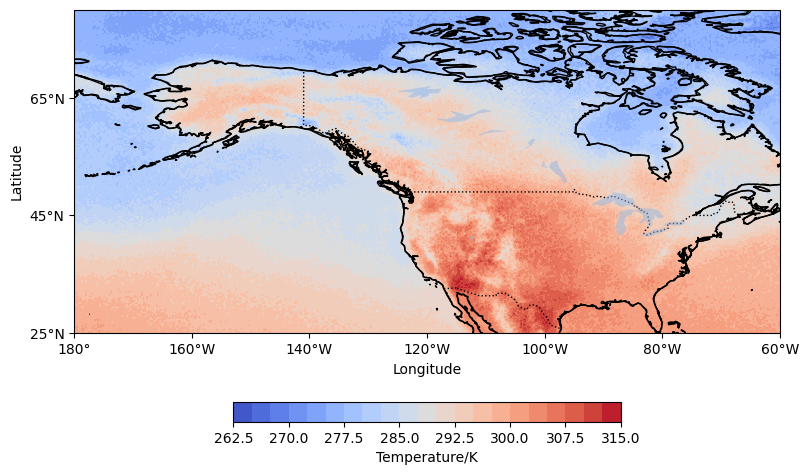

In [122]:
#check for the distribution of climatology of t850



lat = np.linspace(25, 80, 221)
lon = np.linspace(-180, -60, 481)
lon_grid, lat_grid = np.meshgrid(lon, lat)


fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
x, y = lon_grid, lat_grid  
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  
# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
contour1 = ax.contourf(x,y,ds_fcnv2_era_t2m_na_0616_ens[29,::-1,:],cmap='coolwarm',levels=20)
cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal',shrink=0.5)

# Set plot title and labels

plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots07.27/climatology.png', bbox_inches='tight',dpi=100)
# Show the plot
plt.show()

In [9]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_era_0615_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'

for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '2021-06-15'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, '20210615', 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0615_ens.append(ds['t'][55,10,40:261,720:1201])

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


In [56]:
ds_fcnv2_era_t850_na_0615_ens = np.reshape(ds_fcnv2_era_0615_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0615_ens_mean = np.mean(ds_fcnv2_era_t850_na_0615_ens[:,79:159,194:274],axis=(-1,-2))

In [57]:
ds_fcnv2_era_t850_box_0615_ens_mean

array([291.26425, 294.5382 , 292.32486, 291.82593, 294.0202 , 290.7828 ,
       291.55667, 290.18723, 293.83835, 293.07407, 291.4722 , 292.95105,
       293.2252 , 293.022  , 289.91504, 290.3911 , 294.20917, 293.04208,
       291.37686, 292.4343 , 292.07056, 292.86172, 292.11737, 293.3749 ,
       290.67014, 293.46472, 290.08478, 293.54462, 293.56152, 293.55426,
       292.17593, 292.06177, 293.5641 , 293.014  , 292.37634, 293.38   ,
       290.8551 , 293.5621 , 293.23822, 286.6729 , 293.6076 , 294.2173 ,
       291.43552, 291.60202, 292.95895, 293.09952, 293.2983 , 293.2484 ,
       289.58398, 291.91278], dtype=float32)

In [10]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_era_0616_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'

for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210616'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0616_ens.append(ds['t'][51,10,40:261,720:1201])

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


In [97]:
ds_fcnv2_era_t850_na_0616_ens = np.reshape(ds_fcnv2_era_0616_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0616_ens_mean = np.mean(ds_fcnv2_era_t850_na_0616_ens[:,79:159,194:274],axis=(-1,-2))

In [11]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_era_0617_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'

for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210617'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0617_ens.append(ds['t'][47,10,40:261,720:1201])

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


In [63]:
ds_fcnv2_era_t850_na_0617_ens = np.reshape(ds_fcnv2_era_0617_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0617_ens_mean = np.mean(ds_fcnv2_era_t850_na_0617_ens[:,79:159,194:274],axis=(-1,-2))

In [26]:

ds_fcnv2_era = xr.open_dataset('/pfs/work7/workspace/scratch/gj5173-ws_ai_models/era5/gauss_0.3/20210618/forecasts/fcnv2_fc_era5_20210618_0000_m7.nc', engine = 'netcdf4')
ds_fcnv2_era['t']

<xarray.DataArray 't' (time: 48, plev: 13, lat: 721, lon: 1440)>
[647861760 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-06-18T06:00:00 ... 2021-06-30
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * plev     (plev) float64 5e+03 1e+04 1.5e+04 2e+04 ... 8.5e+04 9.25e+04 1e+05
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    param:          0.0.0

In [12]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_era_0618_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'

for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0618_ens.append(ds['t'][43,10,40:261,720:1201])

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(48,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(56,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


In [66]:
ds_fcnv2_era_t850_na_0618_ens = np.reshape(ds_fcnv2_era_0618_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0618_ens_mean = np.mean(ds_fcnv2_era_t850_na_0618_ens[:,79:159,194:274],axis=(-1,-2))

In [13]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_era_0619_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'

for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210619'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0619_ens.append(ds['t'][39,10,40:261,720:1201])

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


In [68]:
ds_fcnv2_era_t850_na_0619_ens = np.reshape(ds_fcnv2_era_0619_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0619_ens_mean = np.mean(ds_fcnv2_era_t850_na_0619_ens[:,79:159,194:274],axis=(-1,-2))

In [14]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_era_0620_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'

for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210620'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0620_ens.append(ds['t'][35,10,40:261,720:1201])

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


In [71]:
ds_fcnv2_era_t850_na_0620_ens = np.reshape(ds_fcnv2_era_0620_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0620_ens_mean = np.mean(ds_fcnv2_era_t850_na_0620_ens[:,79:159,194:274],axis=(-1,-2))

In [15]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-20', end='2021-06-25', freq='D')
ds_fcnv2_era_0621_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'
#for date_ in data_range:
for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210621'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0621_ens.append(ds['t'][31,10,40:261,720:1201])

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(46,)
(49,)


In [74]:
ds_fcnv2_era_t850_na_0621_ens = np.reshape(ds_fcnv2_era_0621_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0621_ens_mean = np.mean(ds_fcnv2_era_t850_na_0621_ens[:,79:159,194:274],axis=(-1,-2))

In [16]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-20', end='2021-06-25', freq='D')
ds_fcnv2_era_0622_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'
#for date_ in data_range:
for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210622'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0622_ens.append(ds['t'][27,10,40:261,720:1201])

(60,)
(60,)
(43,)
(60,)
(34,)
(60,)
(60,)
(60,)
(60,)
(41,)
(35,)
(60,)
(32,)
(47,)
(44,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(33,)
(51,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(35,)
(53,)
(32,)
(60,)
(60,)
(60,)
(60,)


In [76]:
ds_fcnv2_era_t850_na_0622_ens = np.reshape(ds_fcnv2_era_0622_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0622_ens_mean = np.mean(ds_fcnv2_era_t850_na_0622_ens[:,79:159,194:274],axis=(-1,-2))

In [17]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-20', end='2021-06-25', freq='D')
ds_fcnv2_era_0623_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'
#for date_ in data_range:
for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210623'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0623_ens.append(ds['t'][23,10,40:261,720:1201])

(59,)
(60,)
(60,)
(55,)
(47,)
(45,)
(41,)
(34,)
(42,)
(60,)
(60,)
(52,)
(50,)
(35,)
(47,)
(33,)
(55,)
(34,)
(45,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


KeyboardInterrupt: 

In [78]:
ds_fcnv2_era_t850_na_0623_ens = np.reshape(ds_fcnv2_era_0623_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0623_ens_mean = np.mean(ds_fcnv2_era_t850_na_0623_ens[:,79:159,194:274],axis=(-1,-2))

In [18]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-20', end='2021-06-25', freq='D')
ds_fcnv2_era_0624_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'
#for date_ in data_range:
for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210624'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0624_ens.append(ds['t'][19,10,40:261,720:1201])

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


In [95]:
ds_fcnv2_era_t850_na_0624_ens = np.reshape(ds_fcnv2_era_0624_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0624_ens_mean = np.mean(ds_fcnv2_era_t850_na_0624_ens[:,79:159,194:274],axis=(-1,-2))

In [ ]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-20', end='2021-06-25', freq='D')
ds_fcnv2_era_0625_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'
#for date_ in data_range:
for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210625'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0625_ens.append(ds['t'][15,10,40:261,720:1201])

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


In [94]:
ds_fcnv2_era_t850_na_0625_ens = np.reshape(ds_fcnv2_era_0625_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0625_ens_mean = np.mean(ds_fcnv2_era_t850_na_0625_ens[:,79:159,194:274],axis=(-1,-2))

In [83]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-20', end='2021-06-25', freq='D')
ds_fcnv2_era_0626_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'
#for date_ in data_range:
for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210626'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    #print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0626_ens.append(ds['t'][11,10,40:261,720:1201])

In [84]:
ds_fcnv2_era_t850_na_0626_ens = np.reshape(ds_fcnv2_era_0626_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0626_ens_mean = np.mean(ds_fcnv2_era_t850_na_0626_ens[:,79:159,194:274],axis=(-1,-2))

In [85]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-20', end='2021-06-25', freq='D')
ds_fcnv2_era_0627_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'
#for date_ in data_range:
for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210627'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
   # print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0627_ens.append(ds['t'][7,10,40:261,720:1201])

In [86]:
ds_fcnv2_era_t850_na_0627_ens = np.reshape(ds_fcnv2_era_0627_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0627_ens_mean = np.mean(ds_fcnv2_era_t850_na_0627_ens[:,79:159,194:274],axis=(-1,-2))

In [87]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-20', end='2021-06-25', freq='D')
ds_fcnv2_era_0628_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'
#for date_ in data_range:
for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210628'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    #print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0628_ens.append(ds['t'][3,10,40:261,720:1201])

In [88]:
ds_fcnv2_era_t850_na_0628_ens = np.reshape(ds_fcnv2_era_0628_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0628_ens_mean = np.mean(ds_fcnv2_era_t850_na_0628_ens[:,79:159,194:274],axis=(-1,-2))

In [3]:
#read data from 2021-06-14 to 2021-06-24
#date_range = pd.date_range(start='2021-06-20', end='2021-06-25', freq='D')
ds_fcnv2_era_0629_ens = []
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'era5/gauss_0.3/'
#for date_ in data_range:
for member in range(1,51):
    #date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210629'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path ,engine='netcdf4')
    #print(np.shape(ds['2t']['time']))
    ds_fcnv2_era_0629_ens.append(ds['t'][0,10,40:261,720:1201])

In [90]:
ds_fcnv2_era_t850_na_0629_ens = np.reshape(ds_fcnv2_era_0629_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_era_t850_box_0629_ens_mean = np.mean(ds_fcnv2_era_t850_na_0629_ens[:,79:159,194:274],axis=(-1,-2))

In [2]:
%store -r ds_fcnv2_era_t2m_na_0629_ens_mean
%store -r ds_fcnv2_era_t2m_na_0628_ens_mean
%store -r ds_fcnv2_era_t2m_na_0627_ens_mean
%store -r ds_fcnv2_era_t2m_na_0626_ens_mean
%store -r ds_fcnv2_era_t2m_na_0625_ens_mean
%store -r ds_fcnv2_era_t2m_na_0624_ens_mean
%store -r ds_fcnv2_era_t2m_na_0623_ens_mean
%store -r ds_fcnv2_era_t2m_na_0622_ens_mean
%store -r ds_fcnv2_era_t2m_na_0621_ens_mean
%store -r ds_fcnv2_era_t2m_na_0620_ens_mean
%store -r ds_fcnv2_era_t2m_na_0619_ens_mean
%store -r ds_fcnv2_era_t2m_na_0618_ens_mean
%store -r ds_fcnv2_era_t2m_na_0617_ens_mean
%store -r ds_fcnv2_era_t2m_na_0616_ens_mean
%store -r ds_fcnv2_era_t2m_na_0615_ens_mean
#%store ds_fcnv2_era_t2m_na_0614_ens_mean

In [43]:
%store -r ds_fcnv2_era_t850_box_0629_ens_mean
%store -r ds_fcnv2_era_t850_box_0628_ens_mean
%store -r ds_fcnv2_era_t850_box_0627_ens_mean
%store -r ds_fcnv2_era_t850_box_0626_ens_mean
%store -r ds_fcnv2_era_t850_box_0625_ens_mean
%store -r ds_fcnv2_era_t850_box_0624_ens_mean
%store -r ds_fcnv2_era_t850_box_0623_ens_mean
%store -r ds_fcnv2_era_t850_box_0622_ens_mean
%store -r ds_fcnv2_era_t850_box_0621_ens_mean
%store -r ds_fcnv2_era_t850_box_0620_ens_mean
%store -r ds_fcnv2_era_t850_box_0619_ens_mean
%store -r ds_fcnv2_era_t850_box_0618_ens_mean
%store -r ds_fcnv2_era_t850_box_0617_ens_mean
%store -r ds_fcnv2_era_t850_box_0616_ens_mean
%store -r ds_fcnv2_era_t850_box_0615_ens_mean

In [44]:

dates = ['0615', '0616', '0617','0618', '0619', '0620','0621', '0622', '0623','0624', '0625', '0626','0627', '0628', '0629']

# Prefix for the variable name
prefix = 'ds_fcnv2_era_t850_box_'

# Loop through the dates and create DataArray for each
for date in dates:
    variable_name = f"{prefix}{date}_ens_mean"
    globals()[variable_name] = xr.DataArray(globals()[variable_name])

In [48]:
new_dimension = 'time'
ds_fcnv2_era_t850_box_0615_ens_mean_expanded = ds_fcnv2_era_t850_box_0615_ens_mean.expand_dims(**{new_dimension: [0]})
ds_fcnv2_era_t850_box_0616_ens_mean_expanded = ds_fcnv2_era_t850_box_0616_ens_mean.expand_dims(**{new_dimension: [1]})
ds_fcnv2_era_t850_box_0617_ens_mean_expanded = ds_fcnv2_era_t850_box_0617_ens_mean.expand_dims(**{new_dimension: [2]})
ds_fcnv2_era_t850_box_0618_ens_mean_expanded = ds_fcnv2_era_t850_box_0618_ens_mean.expand_dims(**{new_dimension: [3]})
ds_fcnv2_era_t850_box_0619_ens_mean_expanded = ds_fcnv2_era_t850_box_0619_ens_mean.expand_dims(**{new_dimension: [4]})
ds_fcnv2_era_t850_box_0620_ens_mean_expanded = ds_fcnv2_era_t850_box_0620_ens_mean.expand_dims(**{new_dimension: [5]})
ds_fcnv2_era_t850_box_0621_ens_mean_expanded = ds_fcnv2_era_t850_box_0621_ens_mean.expand_dims(**{new_dimension: [6]})
ds_fcnv2_era_t850_box_0622_ens_mean_expanded = ds_fcnv2_era_t850_box_0622_ens_mean.expand_dims(**{new_dimension: [7]})
ds_fcnv2_era_t850_box_0623_ens_mean_expanded = ds_fcnv2_era_t850_box_0623_ens_mean.expand_dims(**{new_dimension: [8]})
ds_fcnv2_era_t850_box_0624_ens_mean_expanded = ds_fcnv2_era_t850_box_0624_ens_mean.expand_dims(**{new_dimension:[9]})
ds_fcnv2_era_t850_box_0625_ens_mean_expanded = ds_fcnv2_era_t850_box_0625_ens_mean.expand_dims(**{new_dimension: [10]})
ds_fcnv2_era_t850_box_0626_ens_mean_expanded = ds_fcnv2_era_t850_box_0626_ens_mean.expand_dims(**{new_dimension: [11]})
ds_fcnv2_era_t850_box_0627_ens_mean_expanded = ds_fcnv2_era_t850_box_0627_ens_mean.expand_dims(**{new_dimension: [12]})
ds_fcnv2_era_t850_box_0628_ens_mean_expanded = ds_fcnv2_era_t850_box_0628_ens_mean.expand_dims(**{new_dimension: [13]})
ds_fcnv2_era_t850_box_0629_ens_mean_expanded = ds_fcnv2_era_t850_box_0629_ens_mean.expand_dims(**{new_dimension: [14]})

mean_ds_fcnv2_era_t850_0629_box = xr.concat([ds_fcnv2_era_t850_box_0615_ens_mean_expanded,ds_fcnv2_era_t850_box_0616_ens_mean_expanded,ds_fcnv2_era_t850_box_0617_ens_mean_expanded,ds_fcnv2_era_t850_box_0618_ens_mean_expanded,ds_fcnv2_era_t850_box_0619_ens_mean_expanded,ds_fcnv2_era_t850_box_0620_ens_mean_expanded,ds_fcnv2_era_t850_box_0621_ens_mean_expanded,ds_fcnv2_era_t850_box_0622_ens_mean_expanded,ds_fcnv2_era_t850_box_0623_ens_mean_expanded,ds_fcnv2_era_t850_box_0624_ens_mean_expanded,ds_fcnv2_era_t850_box_0625_ens_mean_expanded
                           ,ds_fcnv2_era_t850_box_0626_ens_mean_expanded,ds_fcnv2_era_t850_box_0627_ens_mean_expanded,ds_fcnv2_era_t850_box_0628_ens_mean_expanded,ds_fcnv2_era_t850_box_0629_ens_mean_expanded],dim=new_dimension)

In [ ]:
#/pfs/work7/workspace/scratch/gj5173-ws_ai_models/era5/gauss_0.3/date_str/20210616/forecasts/fcnv2_fc_era5_20210616_0000_m0.nc'
#/pfs/work7/workspace/scratch/gj5173-ws_ai_models/era5/gauss_0.3/20210616/forecasts/fcnv2_fc_era5_20210616_0000_m0.nc'
#/pfs/work7/workspace/scratch/gj5173-ws_ai_models/era5/gauss_0.3/20210615/forecasts/fcnv2_fc_era5_2021-06-15_0000_m16.nc 

In [24]:
%store -r mean_ds_fcnv2_era_t850_0629_box

In [25]:
ds_fcnv2_era = xr.open_dataset('/pfs/work7/workspace/scratch/gj5173-ws_ai_models/era5/gauss_0.3/20210616/forecasts/fcnv2_fc_era5_20210616_0000_m1_2_cated.nc', engine = 'netcdf4')
ds_fcnv2_era

<xarray.Dataset>
Dimensions:   (time: 120, lon: 1440, lat: 721, height: 1, height_2: 1,
               height_3: 1, plev: 13)
Coordinates:
  * time      (time) datetime64[ns] 2021-06-16T06:00:00 ... 2021-07-01
  * lon       (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat       (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * height    (height) float64 10.0
  * height_2  (height_2) float64 100.0
  * height_3  (height_3) float64 2.0
  * plev      (plev) float64 5e+03 1e+04 1.5e+04 ... 8.5e+04 9.25e+04 1e+05
Data variables: (12/13)
    10u       (time, height, lat, lon) float32 ...
    10v       (time, height, lat, lon) float32 ...
    u         (time, height_2, lat, lon) float32 ...
    v         (time, height_2, lat, lon) float32 ...
    2t        (time, height_3, lat, lon) float32 ...
    sp        (time, lat, lon) float32 ...
    ...        ...
    tciwv     (time, lat, lon) float32 ...
    u_2       (time, plev, lat, lon) float32 ...
    v_2       (time, plev, lat, lon) float32 ...
    z         (time, plev, lat, lon) float32 ...
    t         (time, plev, lat, lon) float32 ...
    r         (time, plev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Wed Dec 06 15:58:00 2023: cdo cat fcnv2_fc_era5_20210616_00...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [33]:
def create_boxplot(data_array, era5_mean_value,ylable):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_xlabel("Forecast Initialization", labelpad=10)
    ax.set_ylabel(ylabel, labelpad=10)

    data = data_array.T
    ax.boxplot(data)
    ax.axhline(y=era5_mean_value, color='r', linestyle='-', label='ERA5')
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15], ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])
    return fig, ax


In [ ]:
############################################## load fcnv2 ec t850 #######################################################################################################

In [11]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0615_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210615'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0615_ens.append(ds['t'][55, 10, 40:261, 720:1201])

In [12]:
ds_fcnv2_ec_t850_na_0615_ens = np.reshape(ds_fcnv2_ec_0615_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0615_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0615_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0615_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0615_ens_mean' (ndarray)


In [13]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0616_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210616'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0616_ens.append(ds['t'][51, 10, 40:261, 720:1201])

In [17]:
ds_fcnv2_ec_t850_na_0616_ens = np.reshape(ds_fcnv2_ec_0616_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0616_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0616_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0616_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0616_ens_mean' (ndarray)


In [15]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0617_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210617'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0617_ens.append(ds['t'][47, 10, 40:261, 720:1201])

In [16]:
ds_fcnv2_ec_t850_na_0617_ens = np.reshape(ds_fcnv2_ec_0617_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0617_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0617_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0617_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0617_ens_mean' (ndarray)


In [4]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0618_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210618'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0618_ens.append(ds['t'][43, 10, 40:261, 720:1201])


In [6]:
ds_fcnv2_ec_t850_na_0618_ens = np.reshape(ds_fcnv2_ec_0618_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0618_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0618_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0618_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0618_ens_mean' (ndarray)


In [7]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0619_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210619'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0619_ens.append(ds['t'][39, 10, 40:261, 720:1201])

In [8]:
ds_fcnv2_ec_t850_na_0619_ens = np.reshape(ds_fcnv2_ec_0619_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0619_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0619_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0619_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0619_ens_mean' (ndarray)


In [10]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0620_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210620'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0620_ens.append(ds['t'][35, 10, 40:261, 720:1201])

In [11]:
ds_fcnv2_ec_t850_na_0620_ens = np.reshape(ds_fcnv2_ec_0620_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0620_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0620_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0620_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0620_ens_mean' (ndarray)


In [12]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0621_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210621'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0621_ens.append(ds['t'][31, 10, 40:261, 720:1201])

In [13]:
ds_fcnv2_ec_t850_na_0621_ens = np.reshape(ds_fcnv2_ec_0621_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0621_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0621_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0621_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0621_ens_mean' (ndarray)


In [15]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0622_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210622'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0622_ens.append(ds['t'][27, 10, 40:261, 720:1201])

In [16]:
ds_fcnv2_ec_t850_na_0622_ens = np.reshape(ds_fcnv2_ec_0622_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0622_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0622_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0622_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0622_ens_mean' (ndarray)


In [18]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0623_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210623'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0623_ens.append(ds['t'][23, 10, 40:261, 720:1201])

In [19]:
ds_fcnv2_ec_t850_na_0623_ens = np.reshape(ds_fcnv2_ec_0623_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0623_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0623_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0623_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0623_ens_mean' (ndarray)


In [21]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0624_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210624'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0624_ens.append(ds['t'][19, 10, 40:261, 720:1201])

In [24]:
ds_fcnv2_ec_t850_na_0624_ens = np.reshape(ds_fcnv2_ec_0624_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0624_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0624_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0624_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0624_ens_mean' (ndarray)


In [26]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0625_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210625'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0625_ens.append(ds['t'][15, 10, 40:261, 720:1201])

In [27]:
ds_fcnv2_ec_t850_na_0625_ens = np.reshape(ds_fcnv2_ec_0625_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0625_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0625_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0625_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0625_ens_mean' (ndarray)


In [28]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0626_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210626'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0626_ens.append(ds['t'][11, 10, 40:261, 720:1201])

In [29]:
ds_fcnv2_ec_t850_na_0626_ens = np.reshape(ds_fcnv2_ec_0626_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0626_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0626_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0626_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0626_ens_mean' (ndarray)


In [30]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0627_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210627'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0627_ens.append(ds['t'][7, 10, 40:261, 720:1201])

In [31]:
ds_fcnv2_ec_t850_na_0627_ens = np.reshape(ds_fcnv2_ec_0627_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0627_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0627_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0627_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0627_ens_mean' (ndarray)


In [18]:
# Read data from 2021-06-14 to 2021-06-24
# date_range = pd.date_range(start='2021-06-16', end='2021-06-17', freq='D')
ds_fcnv2_ec_0628_ens = []  # Adjust the variable name for the new date
base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
dataset_directory = 'ifs/'

for member in range(1, 51):
    # date_str = date.strftime('%Y%m%d')  # Convert datetime to string
    date_str = '20210628'  # Change the date to '20210618'
    member_str = str(member)
    filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m{member_str}.nc'
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)
    ds = xr.open_dataset(file_path, engine='netcdf4')
    # print(np.shape(ds['2t']['time']))
    ds_fcnv2_ec_0628_ens.append(ds['t'][3, 10, 40:261, 720:1201])

In [19]:
ds_fcnv2_ec_t850_na_0628_ens = np.reshape(ds_fcnv2_ec_0628_ens,(50,221,481))
#%store ds_fcnv2_era_t2m_na_0616_ens
ds_fcnv2_ec_t850_box_0628_ens_mean = np.mean(ds_fcnv2_ec_t850_na_0628_ens[:,79:159,194:274],axis=(-1,-2))
%store ds_fcnv2_ec_t850_box_0628_ens_mean

Stored 'ds_fcnv2_ec_t850_box_0628_ens_mean' (ndarray)


In [ ]:
%store -r ds_fcnv2_ec_t850_box_0615_ens_mean
%store -r ds_fcnv2_ec_t850_box_0616_ens_mean
%store -r ds_fcnv2_ec_t850_box_0617_ens_mean
%store -r ds_fcnv2_ec_t850_box_0618_ens_mean
%store -r ds_fcnv2_ec_t850_box_0619_ens_mean
%store -r ds_fcnv2_ec_t850_box_0620_ens_mean
%store -r ds_fcnv2_ec_t850_box_0621_ens_mean
%store -r ds_fcnv2_ec_t850_box_0622_ens_mean
%store -r ds_fcnv2_ec_t850_box_0623_ens_mean
%store -r ds_fcnv2_ec_t850_box_0624_ens_mean
%store -r ds_fcnv2_ec_t850_box_0625_ens_mean
%store -r ds_fcnv2_ec_t850_box_0626_ens_mean
%store -r ds_fcnv2_ec_t850_box_0627_ens_mean
%store -r ds_fcnv2_ec_t850_box_0628_ens_mean



ds_fcnv2_ec_t850_box_0615_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0615_ens_mean)
ds_fcnv2_ec_t850_box_0616_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0616_ens_mean)
ds_fcnv2_ec_t850_box_0617_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0617_ens_mean)
ds_fcnv2_ec_t850_box_0618_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0618_ens_mean)
ds_fcnv2_ec_t850_box_0619_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0619_ens_mean)
ds_fcnv2_ec_t850_box_0620_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0620_ens_mean)
ds_fcnv2_ec_t850_box_0621_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0621_ens_mean)
ds_fcnv2_ec_t850_box_0622_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0622_ens_mean)
ds_fcnv2_ec_t850_box_0623_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0623_ens_mean)
ds_fcnv2_ec_t850_box_0624_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0624_ens_mean)
ds_fcnv2_ec_t850_box_0625_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0625_ens_mean)
ds_fcnv2_ec_t850_box_0626_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0626_ens_mean)
ds_fcnv2_ec_t850_box_0627_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0627_ens_mean)
ds_fcnv2_ec_t850_box_0628_ens_mean = xr.DataArray(ds_fcnv2_ec_t850_box_0628_ens_mean)

new_dimension = 'time'
ds_fcnv2_ec_t850_box_0615_ens_mean_expanded = ds_fcnv2_ec_t850_box_0615_ens_mean.expand_dims(**{new_dimension: [1]})
ds_fcnv2_ec_t850_box_0616_ens_mean_expanded = ds_fcnv2_ec_t850_box_0616_ens_mean.expand_dims(**{new_dimension: [1]})
ds_fcnv2_ec_t850_box_0617_ens_mean_expanded = ds_fcnv2_ec_t850_box_0617_ens_mean.expand_dims(**{new_dimension: [2]})
ds_fcnv2_ec_t850_box_0618_ens_mean_expanded = ds_fcnv2_ec_t850_box_0618_ens_mean.expand_dims(**{new_dimension: [3]})
ds_fcnv2_ec_t850_box_0619_ens_mean_expanded = ds_fcnv2_ec_t850_box_0619_ens_mean.expand_dims(**{new_dimension: [4]})
ds_fcnv2_ec_t850_box_0620_ens_mean_expanded = ds_fcnv2_ec_t850_box_0620_ens_mean.expand_dims(**{new_dimension: [5]})
ds_fcnv2_ec_t850_box_0621_ens_mean_expanded = ds_fcnv2_ec_t850_box_0621_ens_mean.expand_dims(**{new_dimension: [6]})
ds_fcnv2_ec_t850_box_0622_ens_mean_expanded = ds_fcnv2_ec_t850_box_0622_ens_mean.expand_dims(**{new_dimension: [7]})
ds_fcnv2_ec_t850_box_0623_ens_mean_expanded = ds_fcnv2_ec_t850_box_0623_ens_mean.expand_dims(**{new_dimension: [8]})
ds_fcnv2_ec_t850_box_0624_ens_mean_expanded = ds_fcnv2_ec_t850_box_0624_ens_mean.expand_dims(**{new_dimension:[9]})
ds_fcnv2_ec_t850_box_0625_ens_mean_expanded = ds_fcnv2_ec_t850_box_0625_ens_mean.expand_dims(**{new_dimension: [10]})
ds_fcnv2_ec_t850_box_0626_ens_mean_expanded = ds_fcnv2_ec_t850_box_0626_ens_mean.expand_dims(**{new_dimension: [11]})
ds_fcnv2_ec_t850_box_0627_ens_mean_expanded = ds_fcnv2_ec_t850_box_0627_ens_mean.expand_dims(**{new_dimension: [12]})
ds_fcnv2_ec_t850_box_0628_ens_mean_expanded = ds_fcnv2_ec_t850_box_0628_ens_mean.expand_dims(**{new_dimension: [12]})


mean_ds_fcnv2_ec_t850_0629_box = xr.concat([ds_fcnv2_ec_t850_box_0615_ens_mean_expanded,ds_fcnv2_ec_t850_box_0616_ens_mean_expanded,ds_fcnv2_ec_t850_box_0617_ens_mean_expanded,ds_fcnv2_ec_t850_box_0618_ens_mean_expanded,ds_fcnv2_ec_t850_box_0619_ens_mean_expanded,ds_fcnv2_ec_t850_box_0620_ens_mean_expanded,ds_fcnv2_ec_t850_box_0621_ens_mean_expanded,ds_fcnv2_ec_t850_box_0622_ens_mean_expanded,ds_fcnv2_ec_t850_box_0623_ens_mean_expanded,ds_fcnv2_ec_t850_box_0624_ens_mean_expanded,ds_fcnv2_ec_t850_box_0625_ens_mean_expanded,ds_fcnv2_ec_t850_box_0626_ens_mean_expanded,ds_fcnv2_ec_t850_box_0627_ens_mean_expanded,ds_fcnv2_ec_t850_box_0628_ens_mean_expanded],dim=new_dimension)

In [25]:
%store mean_ds_fcnv2_ec_t850_0629_box

Stored 'mean_ds_fcnv2_ec_t850_0629_box' (DataArray)


(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Forecast Initialization', ylabel='850hPa Temperature'>)

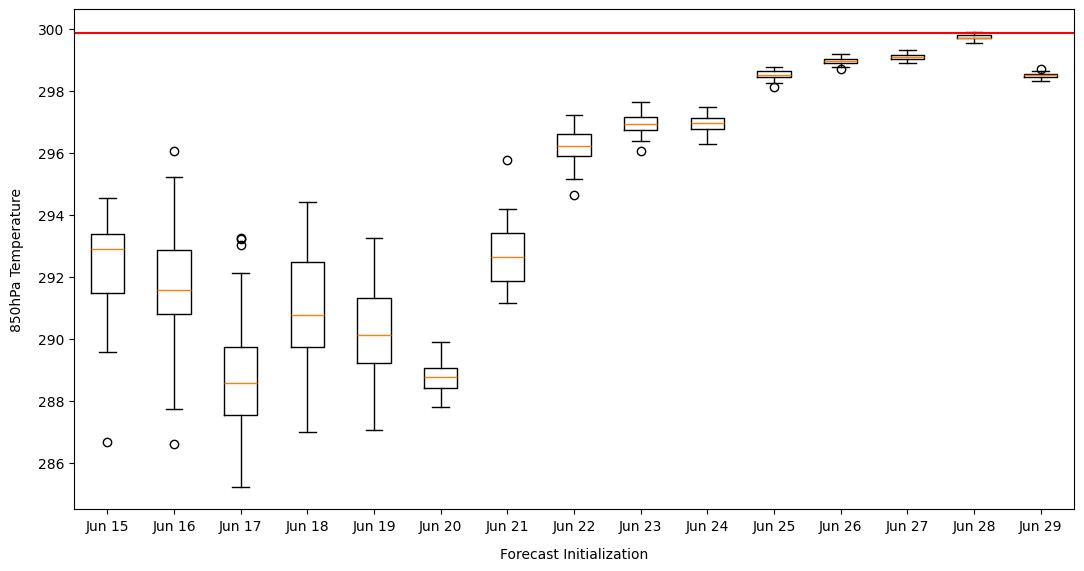

In [34]:
data_array = mean_ds_fcnv2_era_t850_0629
era5_mean_value = ds_era5_t850_box_0629_mean 
ylabel = '850hPa Temperature'
create_boxplot(data_array, era5_mean_value,ylabel)

In [ ]:


#boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("2m Temperature(K)", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=data_array_ec_values.T
ax.boxplot(data)
ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

In [10]:
%store -r ds_ec_t850_box_0629_mean
%store -r ds_ec_t850_box_0629_ens_mean
%store -r ds_fcnv1_ec_t850_box_0629_mean 
%store -r ds_fcnv1_ec_t850_box_ens_0629_mean
%store -r ds_fcnv1_era_t850_box_0629_mean 
%store -r ds_fcnv1_era_t850_box_ens_0629_mean
%store -r ds_era5_t850_box_0629_mean 

ds_fcnv1_ec_t850_box_0629_mean[14] = ds_ec_t850_box_0629_mean[14]
ds_fcnv1_ec_t850_box_ens_0629_mean[14,:] = ds_ec_t850_box_0629_ens_mean[14,:]


#ensemble
%store -r mean_ds_fcnv2_era_t850_0629_box
%store -r mean_ds_fcnv2_ec_t850_0629_box

In [11]:
#cf
%store -r ds_fcnv2_ec_t850_box_0629_mean
%store -r ds_fcnv2_era_t850_box_0629_mean

In [14]:
np.shape(mean_ds_fcnv2_ec_t850_0629_box)

(14, 50)

In [8]:
ds_fcnv2_era_t850_box_0629_mean[1:14]

<xarray.DataArray (dim_0: 13)>
array([292.54935, 294.9288 , 292.1738 , 293.80377, 292.8624 , 290.35193,
       290.87997, 297.19876, 298.44824, 298.31226, 298.03555, 298.31827,
       298.5799 ], dtype=float32)
Dimensions without coordinates: dim_0

In [9]:
ds_fcnv2_era_t850_box_0629_mean[0:14]

<xarray.DataArray (dim_0: 14)>
array([287.54315, 292.54935, 294.9288 , 292.1738 , 293.80377, 292.8624 ,
       290.35193, 290.87997, 297.19876, 298.44824, 298.31226, 298.03555,
       298.31827, 298.5799 ], dtype=float32)
Dimensions without coordinates: dim_0

In [10]:
np.shape(ds_fcnv1_ec_t850_box_ens_0629_mean)

(15, 50)

In [ ]:

fig = plt.figure(figsize=(12, 5)) 

colors = [ 'yellow','lightgreen','lightblue']
data_groups = [mean_ds_fcnv2_ec_t850_0629_box.T,mean_ds_fcnv2_era_t850_0629_box[2:13,:].T,ds_ec_t850_box_0629_ens_mean[2:13,:].T]


# --- Labels for your data:
labels_list = ['06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(mean_ds_fcnv2_era_t850_0629_box[2:13,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 

ax = plt.gca()
ax.set_ylim(280,305) #do this becasue of the outlier problems

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

plt.xlabel('Forecast Initialization')
plt.ylabel('850hPa Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2


# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])




for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c,linewidth=0, edgecolor='blACK'),
    #             capprops=dict(color=c),
               whiskerprops=dict(color='grey',linewidth=1),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),showfliers=True,
                capprops = dict(color='grey',linewidth=1),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, 
                )
%store -r ds_era5_t850_box_mean
line_artists = []
line = plt.axhline(y=ds_era5_t850_box_0629_mean , color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )

point_artists = []
#points_1 = ax.scatter(group_positions[1],ds_ec_t850_box_0629_mean,color='darkblue',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_EC')
#points_2 = ax.scatter(group_positions[0],ds_fcnv1_ec_t850_box_0629_mean,color='brown',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_FCNV1_EC')
#points_3 = ax.scatter(group_positions[2],ds_fcnv1_era_t850_box_0629_mean,color='green',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_FCNV1_GAUSS')
#point_artists.append(points_1)
#point_artists.append(points_2)
#point_artists.append(points_3)


legend_labels = ['FCNV2_IFS','FCNV2_GAUSS','IFS']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:3], colors)] #+ line_artists + point_artists 
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/fcnv2_check//T850_box_fcnv2_ensemble_1727.png', bbox_inches='tight',dpi=200)

plt.show()

-0.5
[[-0.04071428571428571, 0.38785714285714284, 0.8164285714285714, 1.2449999999999999, 1.6735714285714285, 2.102142857142857, 2.5307142857142852, 2.959285714285714, 3.3878571428571425, 3.816428571428571, 4.245, 4.673571428571429, 5.102142857142857, 5.530714285714286]]
0.5
[[-0.04071428571428571, 0.38785714285714284, 0.8164285714285714, 1.2449999999999999, 1.6735714285714285, 2.102142857142857, 2.5307142857142852, 2.959285714285714, 3.3878571428571425, 3.816428571428571, 4.245, 4.673571428571429, 5.102142857142857, 5.530714285714286], [0.04071428571428571, 0.46928571428571425, 0.8978571428571428, 1.3264285714285713, 1.755, 2.1835714285714287, 2.612142857142857, 3.040714285714286, 3.4692857142857143, 3.8978571428571427, 4.326428571428571, 4.755, 5.183571428571428, 5.612142857142857]]
-0.5
0.5
1.5


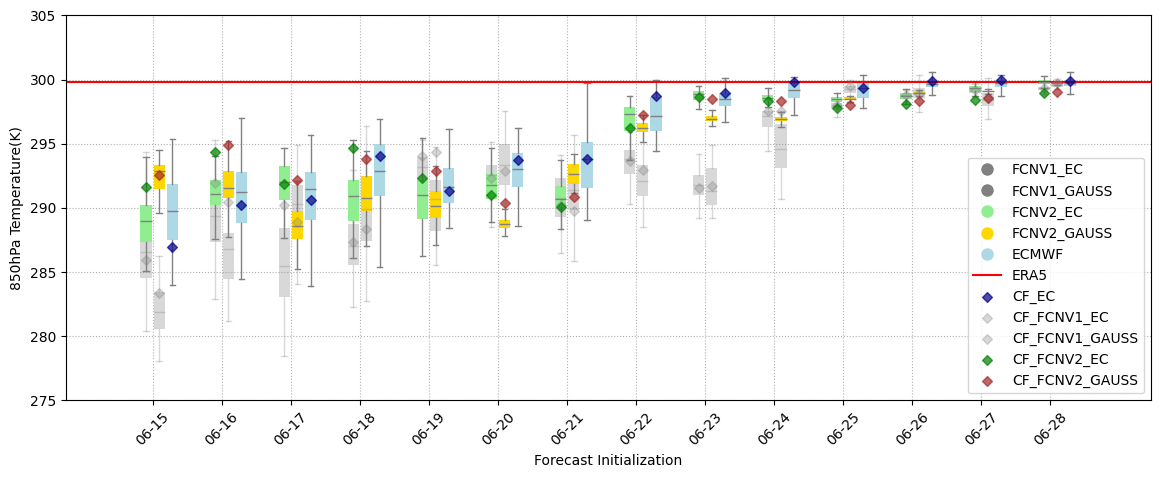

In [20]:
fig = plt.figure(figsize=(14, 5)) 

colors = ['grey','grey','lightgreen','gold','lightblue']
data_groups = [ds_fcnv1_ec_t850_box_ens_0629_mean[0:14,:].T,ds_fcnv1_era_t850_box_ens_0629_mean[0:14,:].T,mean_ds_fcnv2_ec_t850_0629_box.T,mean_ds_fcnv2_era_t850_0629_box[0:14,:].T,ds_ec_t850_box_0629_ens_mean[0:14,:].T]


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(ds_fcnv1_era_t850_box_ens_0629_mean[0:14,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 

ax = plt.gca()
ax.set_ylim(275,305) #do this becasue of the outlier problems

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

plt.xlabel('Forecast Initialization')
plt.ylabel('850hPa Temperature(K)')
#pl.title('title')

space = len(data_groups[2:5])/3
offset = len(data_groups[2:5])/3


# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups[0:2]):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])
    print(group_positions)




for dg, pos, c in zip(data_groups[0:2], group_positions, colors[0:2]):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c,linewidth=0, edgecolor='grey',alpha=0.3),
    #             capprops=dict(color=c),
               whiskerprops=dict(color='grey',linewidth=1,alpha=0.3),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey',alpha=0.3),showfliers=False,
                capprops = dict(color='grey',linewidth=1,alpha=0.3),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, 
                )


space = len(data_groups[2:5])/3
offset = len(data_groups[2:5])/3

group_positions = []
for num, dg in enumerate(data_groups[2:5]):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])




for dg, pos, c in zip(data_groups[2:5], group_positions, colors[2:5]):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c,linewidth=0, edgecolor='grey'),
    #             capprops=dict(color=c),
               whiskerprops=dict(color='grey',linewidth=1),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),showfliers=False,
                capprops = dict(color='grey',linewidth=1),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, 
                )

%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=ds_era5_t850_box_0629_mean , color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )
#add the control forecast
point_artists = []
points_1 = ax.scatter(group_positions[2],ds_ec_t850_box_0629_mean[0:14],color='darkblue',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_EC')
points_2 = ax.scatter(group_positions[0],ds_fcnv1_ec_t850_box_0629_mean[0:14],color='grey',marker='D',zorder = 5,s =25,alpha=0.3,label = 'CF_FCNV1_EC')
points_3 = ax.scatter(group_positions[1],ds_fcnv1_era_t850_box_0629_mean[0:14],color='grey',marker='D',zorder = 5,s =25,alpha=0.3,label = 'CF_FCNV1_GAUSS')
points_4 = ax.scatter(group_positions[0],ds_fcnv2_ec_t850_box_0629_mean[1:15],color='green',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_FCNV2_EC')
points_5 = ax.scatter(group_positions[1],ds_fcnv2_era_t850_box_0629_mean[1:15],color='brown',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_FCNV2_GAUSS')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)
point_artists.append(points_4)
point_artists.append(points_5)



legend_labels = ['FCNV1_EC','FCNV1_GAUSS','FCNV2_EC','FCNV2_GAUSS','ECMWF','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:5], colors)] + line_artists + point_artists 
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/30.01_stroryline/T850_box_v1_v2_bw.png', bbox_inches='tight',dpi=200)

plt.show()

In [57]:

fig = plt.figure(figsize=(14, 5)) 

colors = ['gold','lightgreen','gold','lightgreen','lightblue']
data_groups = [ds_fcnv1_ec_t2m_box_ens_0629_mean[0:14,:].T,ds_fcnv1_era_t2m_box_ens_0629_mean[0:14,:].T,mean_ds_fcnv2_ec_t2m_0629_box.T,mean_ds_fcnv2_era_t2m_0629_box.T,ds_ec_t2m_box_0629_ens_mean[0:14,:].T]


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(ds_fcnv1_era_t2m_box_ens_0629_mean[0:14,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 

ax = plt.gca()
ax.set_ylim(275,305) #do this becasue of the outlier problems

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

plt.xlabel('Forecast Initialization')
plt.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups[2:5])/3
offset = len(data_groups[2:5])/3


# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups[0:2]):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])
    print(group_positions)




for dg, pos, c in zip(data_groups[0:2], group_positions, colors[0:2]):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c,linewidth=0, edgecolor='grey',alpha=0.3),
    #             capprops=dict(color=c),
               whiskerprops=dict(color='grey',linewidth=1,alpha=0.3),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey',alpha=0.3),showfliers=False,
                capprops = dict(color='grey',linewidth=1,alpha=0.3),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, 
                )


space = len(data_groups[2:5])/3
offset = len(data_groups[2:5])/3

group_positions = []
for num, dg in enumerate(data_groups[2:5]):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])




for dg, pos, c in zip(data_groups[2:5], group_positions, colors[2:5]):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c,linewidth=0, edgecolor='grey'),
    #             capprops=dict(color=c),
               whiskerprops=dict(color='grey',linewidth=1),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),showfliers=False,
                capprops = dict(color='grey',linewidth=1),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, 
                )

%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=ds_era5_t2m_box_0629_mean , color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )
#add the control forecast
point_artists = []
points_1 = ax.scatter(group_positions[2],ds_ec_t2m_box_0629_mean[0:14],color='darkblue',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_EC')
points_2 = ax.scatter(group_positions[0],ds_fcnv1_ec_t2m_box_0629_mean[0:14],color='brown',marker='D',zorder = 5,s =25,alpha=0.3,label = 'CF_FCNV1_EC')
points_3 = ax.scatter(group_positions[1],ds_fcnv1_era_t2m_box_0629_mean[0:14],color='green',marker='D',zorder = 5,s =25,alpha=0.3,label = 'CF_FCNV1_GAUSS')
points_4 = ax.scatter(group_positions[0],ds_fcnv2_ec_t2m_box_0629_mean[0:14],color='brown',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_FCNV2_EC')
points_5 = ax.scatter(group_positions[1],ds_fcnv2_era_t2m_box_0629_mean[0:14],color='green',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_FCNV2_GAUSS')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)
point_artists.append(points_4)
point_artists.append(points_5)



legend_labels = ['FCNV1_EC','FCNV1_GAUSS','FCNV2_EC','FCNV2_GAUSS','ECMWF','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:5], colors)] + line_artists + point_artists 
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/30.01_stroryline/T2m_box_v1_v2.png', bbox_inches='tight',dpi=200)

plt.show()

<xarray.DataArray 't' ()>
array(283.88666, dtype=float32)
Coordinates:
    time     int64 2
    level    int32 850
    number   int32 35

In [ ]:
#outlier shows
import matplotlib.pyplot as pl
%store -r data_array_fc_era_values

colors = ['pink', 'lightblue','lightgreen']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_fc_ec_values[:,1:51].T,data_array_ec_values[:,:].T,data_array_fc_era_values[:,1:51].T]
#np.shape(data_groups)



# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(ymin,ymax)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['FourCastnNet(ECMWF)', 'ECMWF','FourCastnNet(ERA5)','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:3], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_outliers.png', bbox_inches='tight',dpi=100)

pl.show()

In [ ]:
import matplotlib.pyplot as pl
%store -r data_array_fc_era_values

colors = [ 'lightblue','lightgreen']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_ec_values[:,:].T,data_array_fc_era_values[:,1:51].T]
np.shape(data_groups)

In [ ]:
# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(ymin,305)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=True
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['ECMWF','FourCastnNet(ERA5)','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:2], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_2.png', bbox_inches='tight',dpi=100)

pl.show()

In [ ]:
import matplotlib.pyplot as pl
%store -r data_array_fc_era_values

colors = ['pink', 'lightblue','lightgreen']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_fc_ec_values[:,1:51].T,data_array_ec_values[:,:].T]
#np.shape(data_groups)



# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(ymin,305)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=True
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['FourCastnNet(ECMWF)', 'ECMWF','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:2], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_1.png', bbox_inches='tight',dpi=100)

pl.show()

In [ ]:

import matplotlib.pyplot as pl
%store -r data_array_fc_era_values

colors = ['pink', 'lightgreen']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_fc_ec_values[:,1:51].T,data_array_fc_era_values[:,1:51].T]
#np.shape(data_groups)



# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(ymin,305)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, showfliers=True,showmeans=False
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['FourCastnNet(ECMWF)','FourCastnNet(ERA5)','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:2], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_0.png', bbox_inches='tight',dpi=100)

pl.show()